# Benchmarcks and plots of SVM DDPG step envs

In [9]:
import numpy as np
import h5py

import matplotlib
import matplotlib.pyplot as plt
import itertools
from matplotlib import cm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
%load_ext autoreload
%autoreload 2
from IPython import get_ipython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
## All the data stored in the hdf5 file
f = h5py.File('runs_step_envs/run_13.hdf5', 'r')

list(f.keys())

['actor_models',
 'critic_models',
 'energies',
 'hyperparams',
 'info',
 'princip_dims',
 'rewards',
 'sigmas']

In [19]:
## Read file and print its info and hyperparams
for k in f['info'].attrs.keys():
    print(k, ' : ', f['info'].attrs[k])

for k in f['hyperparams'].attrs.keys():
    print(k, ' : ', f['hyperparams'].attrs[k])

alg  :  DDPG
env  :  svmEnv-v0
add_noise_every  :  1
batch_size  :  64
bootstrap_size  :  5
gamma  :  1.0
lr_actor  :  0.0001
lr_critic  :  0.0001
num_update  :  1
tau  :  0.001
transfer_every  :  1
update_every  :  1


In [20]:
## Example of data stored and number of episodes
# print(list(f['rewards'].keys()))
num_ep = len(f['rewards'].keys())
print('The number of episodes is then:', num_ep)

The number of episodes is then: 600


The max score is at episode 497 and is equal to 12606.6708984375
The min score is at episode 230 and is equal to -435.8743896484375


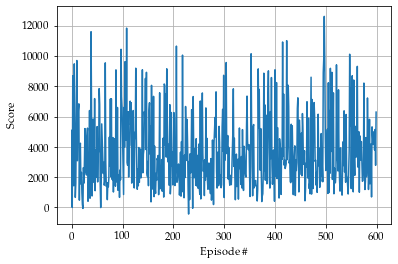

In [21]:
## Score data analysis

scores = np.zeros(len(f['rewards'].keys()))
for i in range(len(f['rewards'].keys())):
    scores[i] = np.sum(f['rewards'][f'rew_ep_{i}'][:])
    
## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')

## Plot scores
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Score')
plt.xlabel('Episode \#')
plt.plot(np.arange(len(scores)), scores)
plt.savefig('./graphs/scores_ddpg_step_den.pdf', format='pdf', dpi=1000)

The min en (BEST CASE) is at episode 413 and is equal to -0.15041400492191315
[ 1.10948e+02  1.10948e+02  1.10948e+02  5.88115e+01  5.86077e+01
  5.55079e+01  8.95637e+00  8.86747e+00  8.86741e+00  8.86736e+00
  1.22966e+00  1.22148e+00  3.92621e-02 -1.82557e-02 -2.84713e-02
 -3.42452e-02 -3.50048e-02 -3.51114e-02 -3.53249e-02 -5.14897e-02
 -5.59544e-02 -6.83356e-02 -7.48830e-02 -7.49145e-02 -7.49454e-02
 -7.49450e-02 -7.49621e-02 -7.49723e-02 -7.49738e-02 -7.49738e-02
 -8.91934e-02 -8.91934e-02 -8.91939e-02 -8.91876e-02 -8.91876e-02
 -8.91870e-02 -1.13374e-01 -1.13377e-01 -1.13377e-01 -1.13377e-01
 -1.13377e-01 -1.13378e-01 -1.13377e-01 -1.13377e-01 -1.13377e-01
 -1.13377e-01 -1.13378e-01 -1.13377e-01 -1.13378e-01 -1.16359e-01
 -1.25080e-01 -1.44691e-01 -1.44691e-01 -1.44691e-01 -1.44692e-01
 -1.44692e-01 -1.44692e-01 -1.44945e-01 -1.44946e-01 -1.44946e-01
 -1.44946e-01 -1.44946e-01 -1.45373e-01 -1.45484e-01 -1.45484e-01
 -1.45484e-01 -1.45484e-01 -1.45484e-01 -1.45484e-01 -1.45621e-0

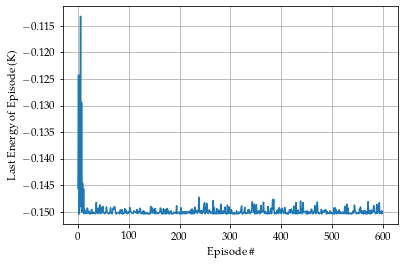

In [22]:
## Energies data analysis
last_en_per_ep = np.zeros(num_ep)
for i in range(num_ep):
    en_ep = f['energies'][f'en_ep_{i}'][:]
    last_en_per_ep[i] = en_ep[-1]
    
## Max and min
index_min = np.argmin(last_en_per_ep)
index_max = np.argmax(last_en_per_ep)
print(f'The min en (BEST CASE) is at episode {index_min} and is equal to {last_en_per_ep[index_min]}')
print(f['energies'][f'en_ep_{index_min}'][:])
print(f'The max en (WORST CASE) is at episode {index_max} and is equal to {last_en_per_ep[index_max]}')
print(f['energies'][f'en_ep_{index_max}'][:])

## Plot energies 
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Last Energy of Episode (K)')
plt.xlabel('Episode \#')
plt.plot(np.arange(len(last_en_per_ep)), last_en_per_ep)
plt.savefig('./graphs/energies_ddpg_step_den.pdf', format='pdf', dpi=1000)

The biggest pri dim (BEST CASE) is at episode 501 and is equal to 146.0
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  20  21  22  23  24  24  25  26  27  27  27  27  28  28  28  28
  29  29  29  30  31  31  32  32  32  33  33  34  34  35  36  37  38  39
  39  39  39  39  39  39  39  39  39  39  39  40  41  42  42  42  42  42
  43  44  45  46  47  48  49  49  49  49  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  67  67  67  68  69  70  70
  70  70  70  70  70  70  71  71  71  71  71  71  71  71  71  71  72  72
  72  72  73  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  87  87  87  87  87  87  87  87  87  87  88  88  88  89  90  90  90  90
  90  90  90  90  90  90  90  90  90  91  92  93  94  94  94  94  95  95
  95  95  95  95  95  96  96  96  96  96  96  97  97  98  98  99 100 101
 102 103 103 104 105 106 107 108 108 108 108 108 108 108 108 109 110 111
 112 113 113 114 115 116 117 118 118 119 120 121 122

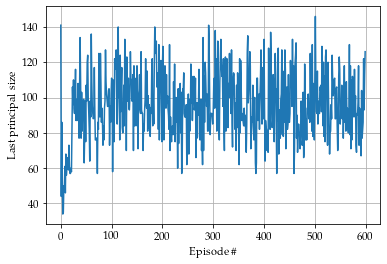

In [23]:
## Pri dim data analysis
last_pri_per_ep = np.zeros(num_ep)
for i in range(num_ep):
    pri_ep = f['princip_dims'][f'pri_dim_ep_{i}'][:]
    last_pri_per_ep[i] = pri_ep[-1]
    
## Max and min
index_max = np.argmax(last_pri_per_ep)
index_min = np.argmin(last_pri_per_ep)
print(f'The biggest pri dim (BEST CASE) is at episode {index_max} and is equal to {last_pri_per_ep[index_max]}')
print(f['princip_dims'][f'pri_dim_ep_{index_max}'][:])
print(f'The smallest pri dim (WORST CASE) is at episode {index_min} and is equal to {last_pri_per_ep[index_min]}')
print(f['princip_dims'][f'pri_dim_ep_{index_min}'][:])

## Plot energies over episode    
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Last principal size')
plt.xlabel('Episode \#')
plt.plot(np.arange(len(last_pri_per_ep)), last_pri_per_ep)
plt.savefig('./graphs/pri_dim_ddpg_step_den.pdf', format='pdf', dpi=1000)

In [ ]:
## Rewards of episode with max score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_max}'])), f['rewards'][f'rew_ep_{index_max}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_max}'][:]))

In [ ]:
## Plot energies of episode with max score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_max}'])), f['energies'][f'en_ep_{index_max}'][:])
plt.ylabel('Energy (K)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_max}'][-1])

In [ ]:
## Plot princip dim of episode with max score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_max}'])), f['princip_dims'][f'pri_dim_ep_{index_max}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_max}'][-1])

[[  4.5590057 110.          3.3175163]
 [  1.        108.15525     1.       ]
 [  1.        110.          2.3724709]
 [  1.        104.55669     8.542225 ]
 [ 12.0250435 110.         32.746117 ]
 [  1.8489685 110.         47.164154 ]
 [  1.        110.         29.955667 ]
 [  7.9610825 110.         39.814167 ]
 [ 24.039654  110.         36.415344 ]
 [ 11.860336  110.         27.318048 ]
 [ 23.92245   110.         27.639084 ]
 [ 35.16408   110.         42.648094 ]
 [ 19.31828   110.         25.530775 ]
 [  6.9733086 110.         20.912731 ]
 [  1.        110.         23.888462 ]
 [ 18.878788  110.          9.648937 ]
 [ 19.539928  110.         18.189747 ]
 [ 17.092152  110.         24.54451  ]
 [  2.5158653 110.          1.       ]
 [  8.034237  110.          1.       ]
 [  1.        110.          1.       ]
 [  9.176769  110.          1.       ]
 [ 18.027248  110.          1.       ]
 [ 28.137655  110.          1.       ]
 [ 16.653503  110.          1.       ]
 [  7.69413   110.       

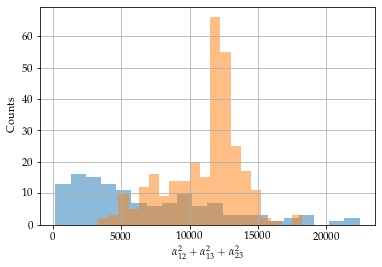

In [24]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep_{index_max}'][:]
print(sigmas_rl)
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

## Plot sigmas of ep with max score
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Counts')
plt.xlabel('$\\alpha_{12}^2 + \\alpha_{13}^2 + \\alpha_{23}^2$')
plt.hist(sigmas_random_squared, bins=20, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=20, alpha=0.5)
plt.savefig('./graphs/sigmas_max_ddpg_step_den.pdf', format='pdf', dpi=1000)

In [ ]:
## Plot rewards of episode with min score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_min}'])), f['rewards'][f'rew_ep_{index_min}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_min}'][:]))

In [ ]:
## Plot energies of episode with min score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_min}'])), f['energies'][f'en_ep_{index_min}'][:])
plt.ylabel('Energy (K)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_min}'][-1])

In [ ]:
## Plot princip dim of episode with min score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_min}'])), f['princip_dims'][f'pri_dim_ep_{index_min}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_min}'][-1])

[[ 1.        12.597675   1.       ]
 [ 1.         1.         1.       ]
 [ 1.        18.23631    1.       ]
 [ 4.734497  21.504162   1.       ]
 [14.865334  22.474182   1.       ]
 [29.620262  20.274128   1.       ]
 [29.765093  11.873974   1.       ]
 [26.268358   1.5191383  1.       ]
 [36.17901    8.379532   1.       ]
 [41.893547   7.3466988  1.       ]
 [46.088356  12.161415   1.       ]
 [38.827324  25.040327   1.       ]
 [30.191093  36.302647   1.       ]
 [20.004547  20.75373    1.       ]
 [12.17028   28.069002   1.       ]
 [21.854713  39.928078   1.       ]
 [28.172592  41.740906   1.       ]
 [31.43011   34.684353   1.       ]
 [23.095695  34.614517   1.       ]
 [ 9.587784  23.93677    1.       ]
 [ 1.         8.724232   1.       ]
 [ 1.         1.         1.       ]
 [ 1.         3.700924   1.       ]
 [ 1.         1.         1.       ]
 [ 1.         3.4362068  1.       ]
 [ 1.         1.         1.       ]
 [ 1.         1.         1.       ]
 [ 1.         1.         1. 

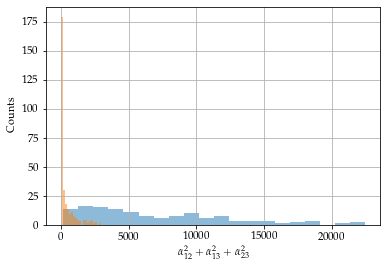

In [25]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep_{index_min}'][:]
print(sigmas_rl)
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

## Plot sigmas of ep with min score
plt.rcParams.update({'font.size': 11})
plt.grid(True)
plt.ylabel('Counts')
plt.xlabel('$\\alpha_{12}^2 + \\alpha_{13}^2 + \\alpha_{23}^2$')
plt.hist(sigmas_random_squared, bins=20, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=20, alpha=0.5)
plt.savefig('./graphs/sigmas_min_ddpg_step_den.pdf', format='pdf', dpi=1000)

In [ ]:
sigmas_rl = f['sigmas']['sigmas_ep_5'][:]
print(sigmas_rl)